In [3]:
train_path = "./CMAPSSData/train_FD001.txt"

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.nonparametric.smoothers_lowess import lowess

In [ ]:
standard_scaler = StandardScaler()
# test

In [82]:
train_data = pd.read_csv(train_path, delim_whitespace=True, header=None)

C:\Users\tanbi\AppData\Local\Temp\ipykernel_23008\528830271.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv(train_path, delim_whitespace=True, header=None)


In [55]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

# Columns
1)	unit number
2)	time, in cycles
3)	operational setting 1
4)	operational setting 2
5)	operational setting 3
6)	sensor measurement  1
7)	sensor measurement  2
...
26)	sensor measurement  26

In [7]:
pd.set_option('display.max_columns', None)
print(train_data.describe())

                 0             1             2             3        4   \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

                 5             6             7             8             9   \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+

## col-4, col-3, col-22, col-23, col-20, col-19, col-14, col-9, col-5 

In [83]:
train_data = train_data.drop([4, 3, 22, 23, 20, 19, 14, 9, 5], axis=1)
train_data

,0,1,2,6,7,8,10,11,12,13,15,16,17,18,21,24,25
0,1,1,-0.0007,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,392,39.06,23.4190
1,1,2,0.0019,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,392,39.00,23.4236
2,1,3,-0.0043,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,390,38.95,23.3442
3,1,4,0.0007,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,392,38.88,23.3739
4,1,5,-0.0019,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,397,38.49,22.9735
20627,100,197,-0.0016,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,395,38.30,23.1594
20628,100,198,0.0004,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,398,38.44,22.9333
20629,100,199,-0.0011,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,395,38.29,23.0640


In [ ]:
print(train_data.describe())

In [16]:
train_data.isnull().sum()

0     0
1     0
2     0
6     0
7     0
8     0
10    0
11    0
12    0
13    0
15    0
16    0
17    0
18    0
21    0
24    0
25    0
dtype: int64

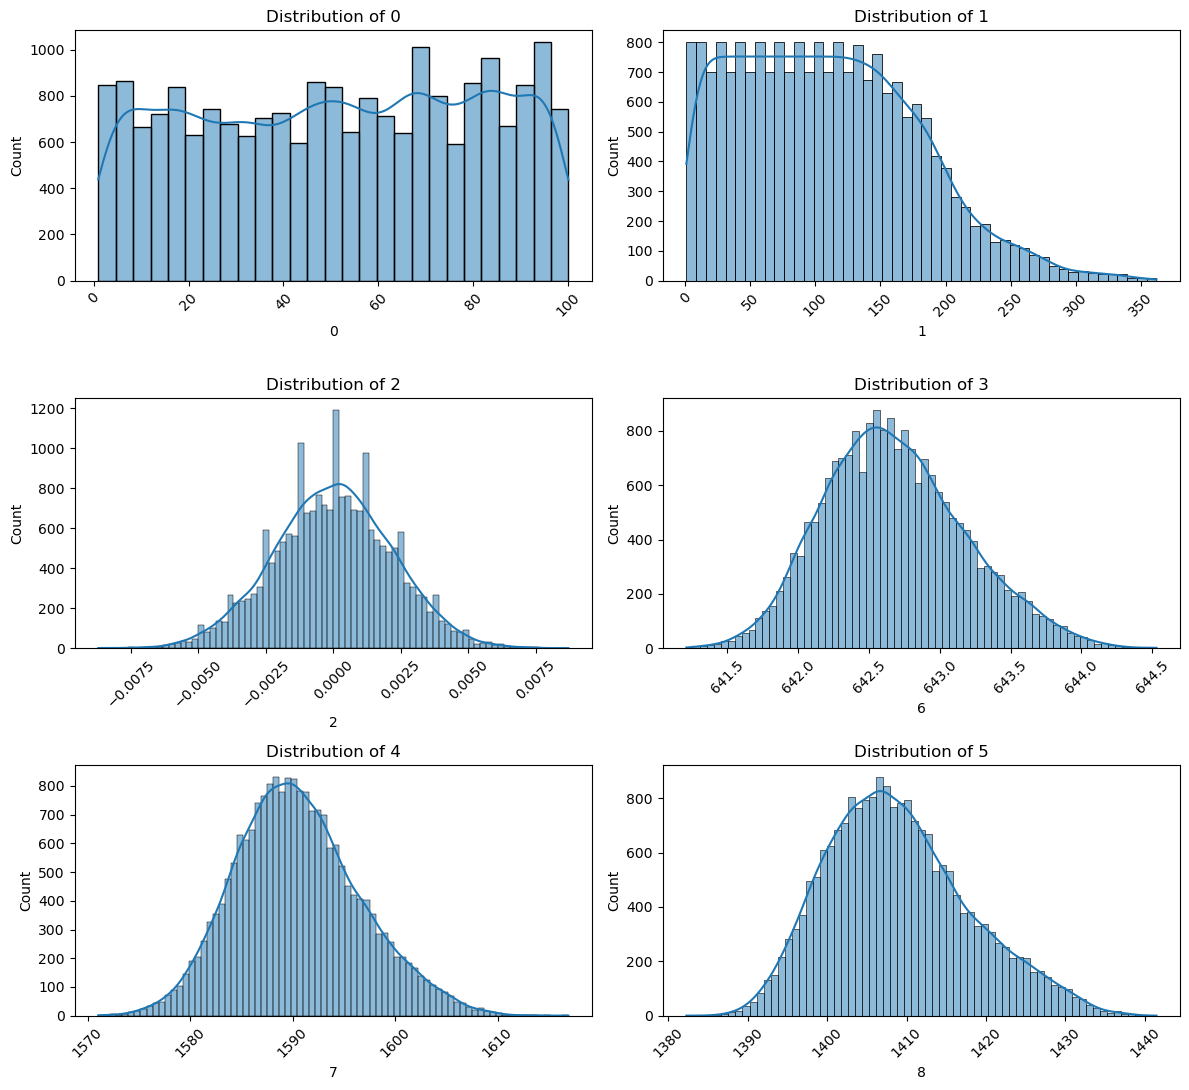

In [29]:
plt.figure(figsize=(12, 11))
for i, column in enumerate(train_data.columns):
    if(i >= 6):
        break
    plt.subplot(3, 2, i+1)
    sns.histplot(train_data[column], kde=True)
    plt.title(f"Distribution of {i}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [74]:
single_engine_data = train_data[train_data[0] == 2]

In [31]:
single_engine_data

,0,1,2,6,7,8,10,11,12,13,15,16,17,18,21,24,25
0,1,1,-0.0007,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,392,39.06,23.4190
1,1,2,0.0019,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,392,39.00,23.4236
2,1,3,-0.0043,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,390,38.95,23.3442
3,1,4,0.0007,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,392,38.88,23.3739
4,1,5,-0.0019,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,643.75,1602.38,1422.78,21.61,551.94,2388.31,9037.91,48.00,519.79,2388.23,8117.69,396,38.51,22.9588
188,1,189,-0.0006,644.18,1596.17,1428.01,21.61,550.70,2388.27,9044.55,48.08,519.58,2388.33,8117.51,395,38.48,23.1127
189,1,190,-0.0027,643.64,1599.22,1425.95,21.61,551.29,2388.29,9040.58,48.33,520.04,2388.35,8112.58,398,38.49,23.0675
190,1,191,-0.0000,643.34,1602.36,1425.77,21.61,550.92,2388.28,9042.76,48.15,519.57,2388.30,8114.61,394,38.45,23.1295


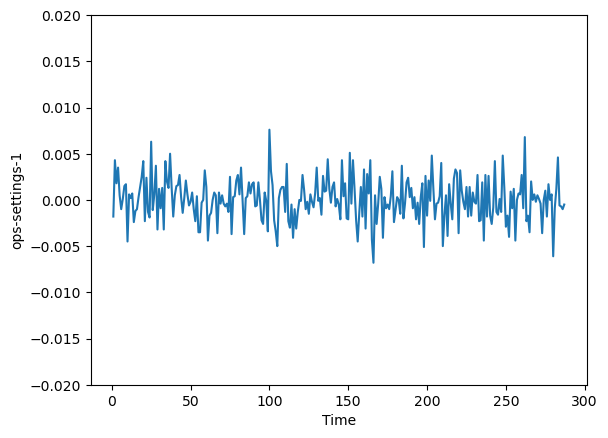

In [75]:
sns.lineplot(data=single_engine_data, x=single_engine_data[1], y=single_engine_data[2])
plt.xlabel("Time")
plt.ylabel("ops-settings-1")
plt.ylim(-0.02, 0.02)
plt.show()

In [ ]:
def plot_smoothed_trend(df, x_col, y_col, frac=0.5, window=10, show_rolling=False):
    y = df[y_col]
    x = df[x_col]

    # LOWESS
    lowess = sm.nonparametric.lowess
    smoothed = lowess(y, x, frac=frac)

    # Rolling average
    rolling_avg = y.rolling(window=window, center=True).mean()

    plt.figure(figsize=(10, 4))
    sns.lineplot(x=x, y=y, label='Original', color='blue')

    # Smoothed trend
    plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Smooth Trend')

    # Rolling average (optional)
    if show_rolling:
        plt.plot(x, rolling_avg, color='green', label='Rolling Avg', linestyle='--')

    plt.legend()
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Column: {y_col}')
    plt.tight_layout()
    plt.show()


In [70]:
single_engine_data.columns

Index([0, 1, 2, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 21, 24, 25], dtype='int64')

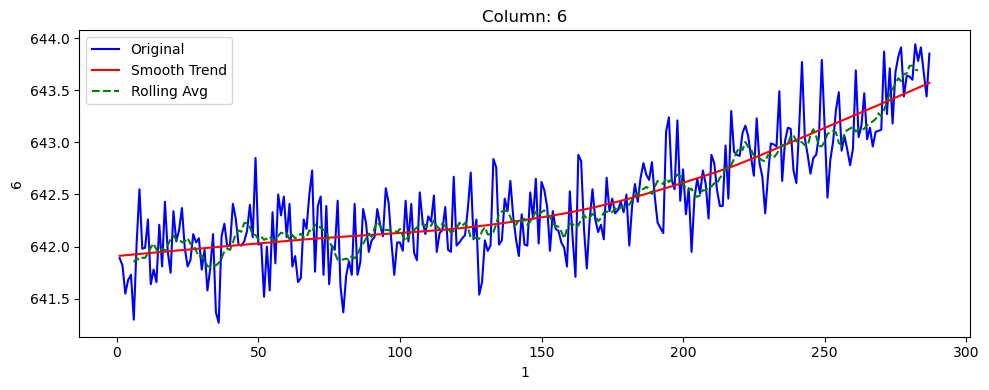

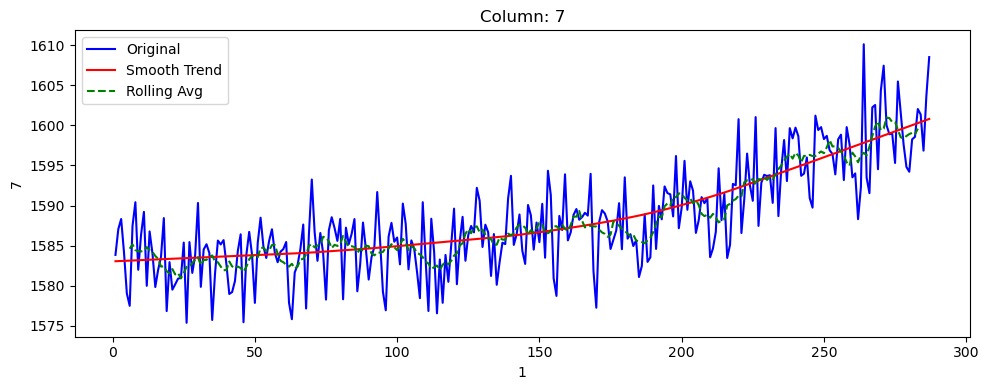

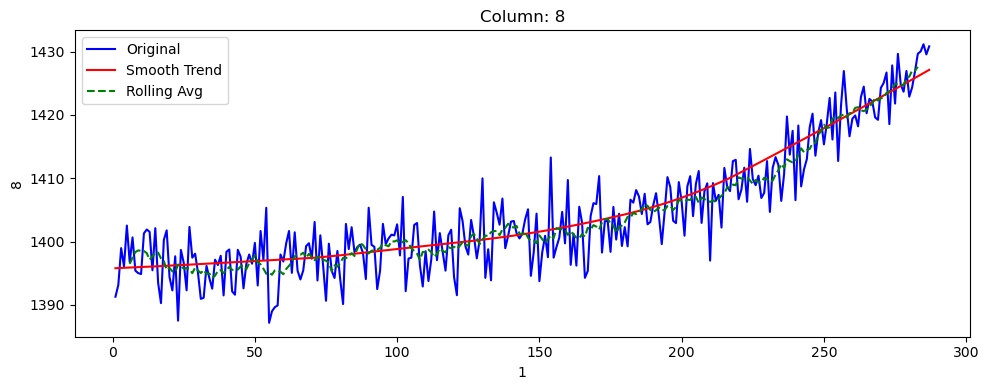

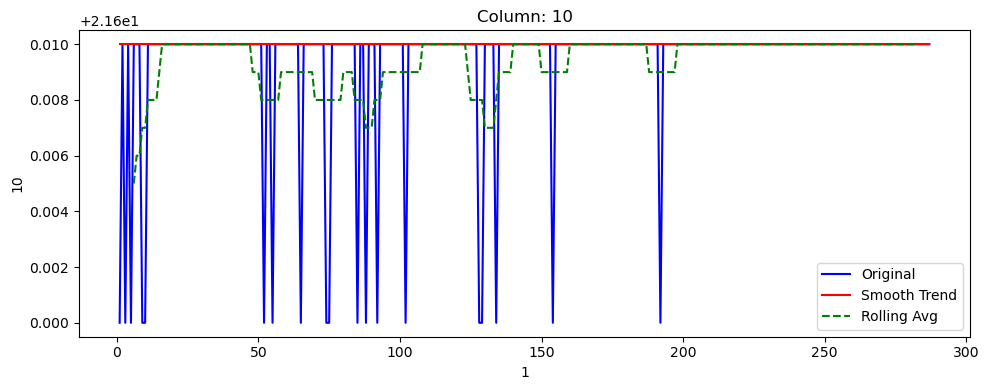

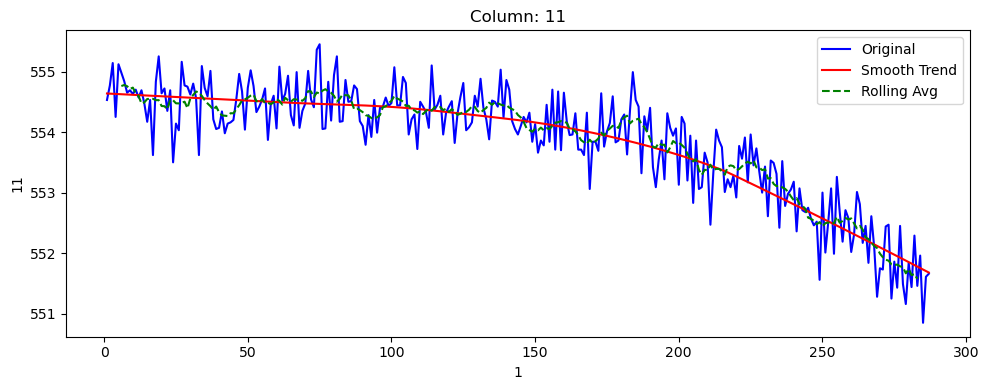

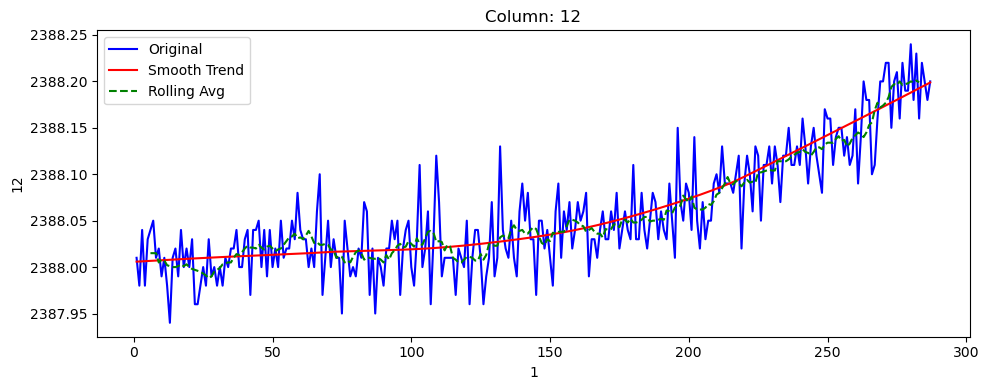

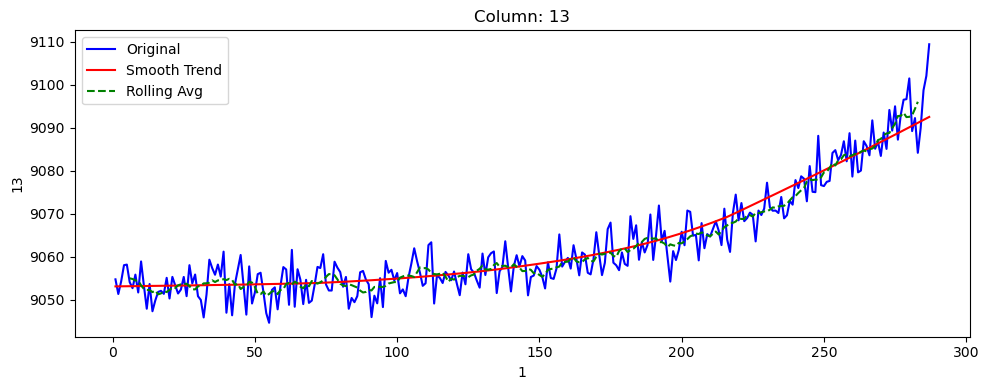

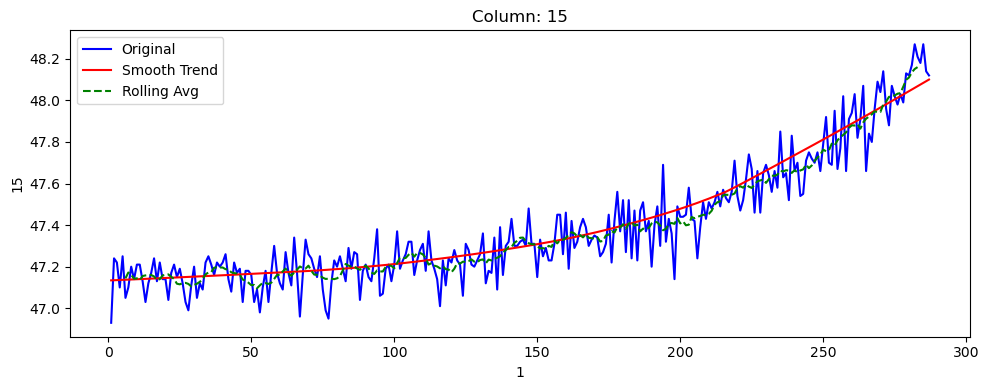

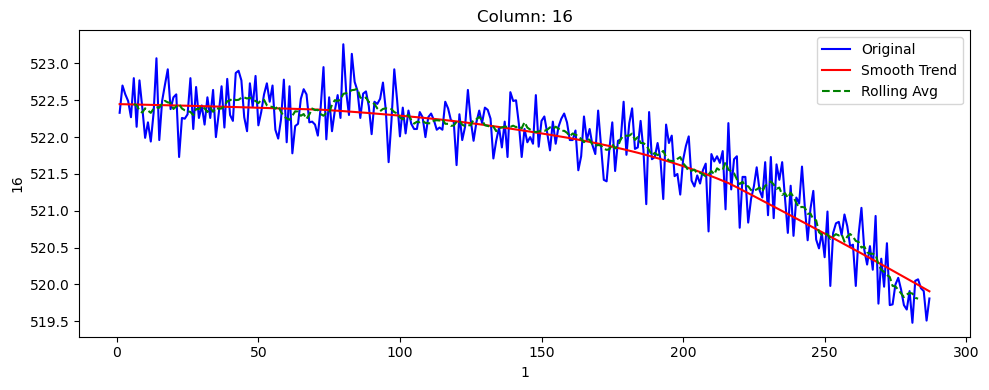

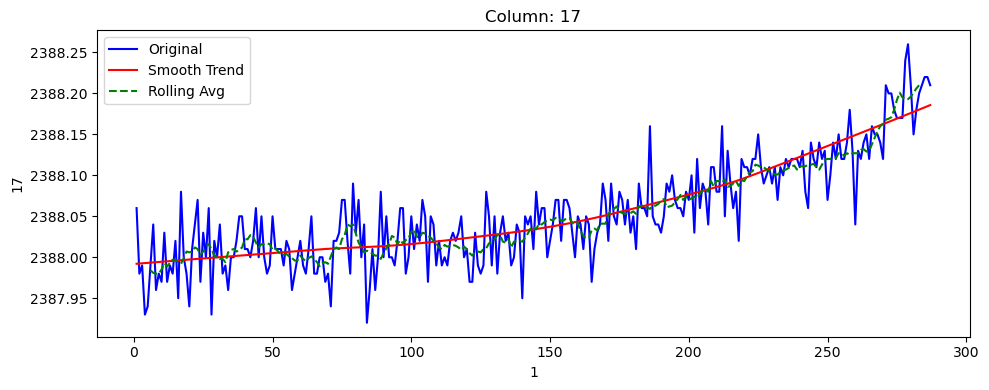

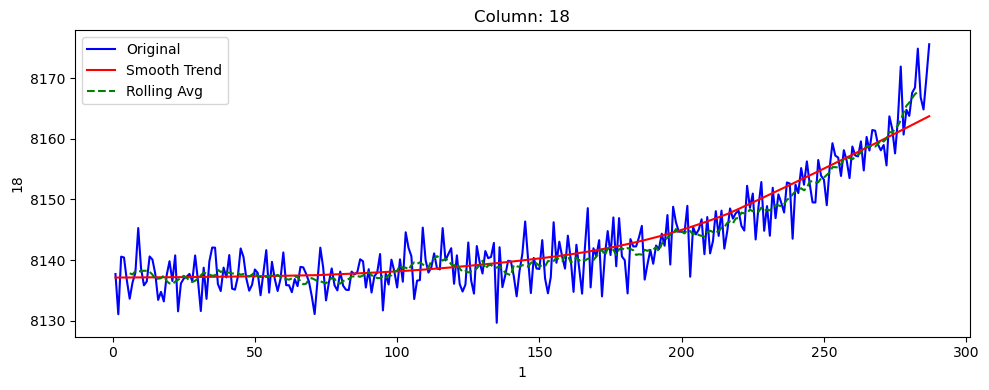

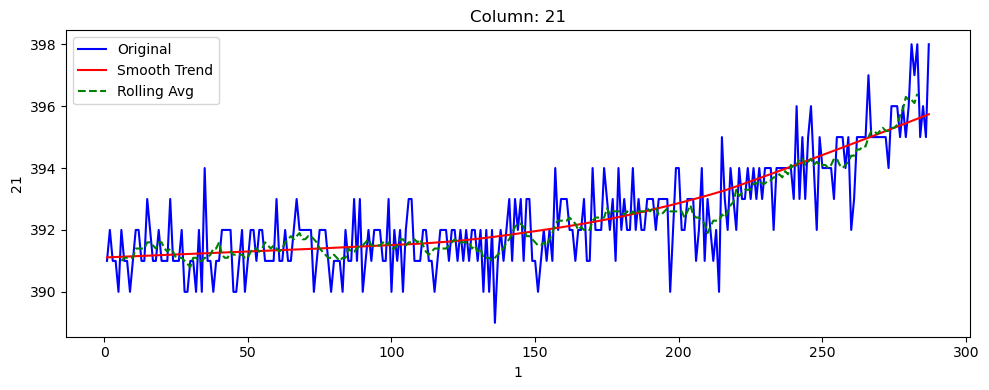

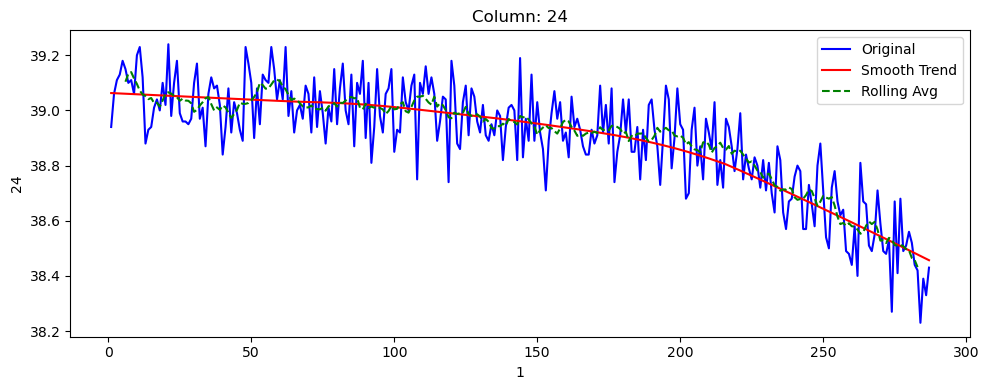

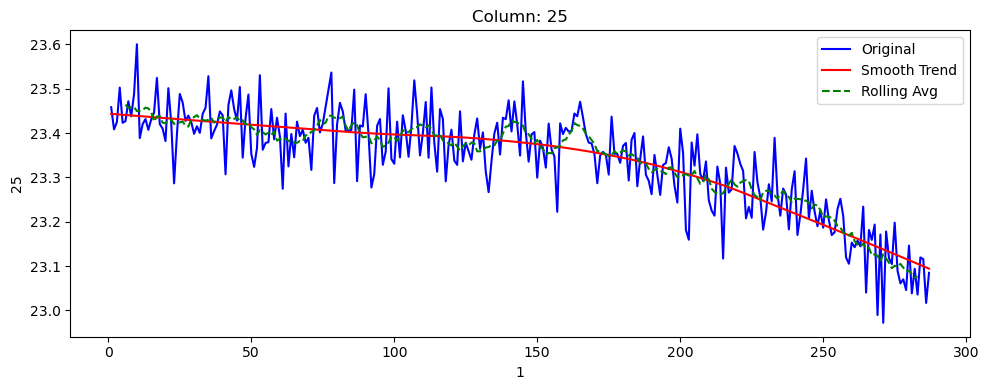

In [76]:
for col_idx in single_engine_data.columns[3:]:
    plot_smoothed_trend(single_engine_data, x_col=1, y_col=col_idx, frac=0.5, window=10, show_rolling=True)

In [84]:
train_data = train_data.drop([10], axis=1)

In [66]:
train_data

,0,1,2,6,7,8,11,12,13,15,16,17,18,21,24,25
0,1,1,-0.0007,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,392,39.06,23.4190
1,1,2,0.0019,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,392,39.00,23.4236
2,1,3,-0.0043,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,390,38.95,23.3442
3,1,4,0.0007,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,392,38.88,23.3739
4,1,5,-0.0019,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,397,38.49,22.9735
20627,100,197,-0.0016,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,395,38.30,23.1594
20628,100,198,0.0004,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,398,38.44,22.9333
20629,100,199,-0.0011,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,395,38.29,23.0640


In [85]:
train_data.columns = ['number', 'time', 'ops-set-1', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_21', 'sensor_24', 'sensor_25']

In [86]:
train_data.columns

Index(['number', 'time', 'ops-set-1', 'sensor_6', 'sensor_7', 'sensor_8',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_21', 'sensor_24', 'sensor_25'],
      dtype='object')

In [86]:
single_engine_data_new = train_data[train_data['number'] == 1]
single_engine_data_new.to_csv('engine_data.csv', index=False, header=False)

In [96]:
single_engine_data.iloc[0, 6]

21.6

# Data Processing

In [68]:
train_data

,number,time,ops-set-1,sensor_6,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_16,sensor_17,sensor_18,sensor_21,sensor_24,sensor_25
0,1,1,-0.0007,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,392,39.06,23.4190
1,1,2,0.0019,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,392,39.00,23.4236
2,1,3,-0.0043,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,390,38.95,23.3442
3,1,4,0.0007,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,392,38.88,23.3739
4,1,5,-0.0019,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,397,38.49,22.9735
20627,100,197,-0.0016,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,395,38.30,23.1594
20628,100,198,0.0004,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,398,38.44,22.9333
20629,100,199,-0.0011,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,395,38.29,23.0640


In [87]:
train_data

,number,time,ops-set-1,sensor_6,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_16,sensor_17,sensor_18,sensor_21,sensor_24,sensor_25
0,1,1,-0.0007,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,392,39.06,23.4190
1,1,2,0.0019,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,392,39.00,23.4236
2,1,3,-0.0043,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,390,38.95,23.3442
3,1,4,0.0007,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,392,38.88,23.3739
4,1,5,-0.0019,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,397,38.49,22.9735
20627,100,197,-0.0016,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,395,38.30,23.1594
20628,100,198,0.0004,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,398,38.44,22.9333
20629,100,199,-0.0011,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,395,38.29,23.0640


In [88]:
sensor_col = train_data.columns[3:]
for sensor in sensor_col:
    train_data[f"{sensor}_rolling_mean"] = train_data[sensor].rolling(window=10).mean()
    train_data[f"{sensor}_rolling_std"] = train_data[sensor].rolling(window=10).std()
    train_data[f"{sensor}_rolling_rms"] = train_data[sensor].rolling(window=10).apply(lambda x: np.sqrt(np.mean(x**2)))

In [89]:
train_data

,number,time,ops-set-1,sensor_6,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,...,sensor_18_rolling_rms,sensor_21_rolling_mean,sensor_21_rolling_std,sensor_21_rolling_rms,sensor_24_rolling_mean,sensor_24_rolling_std,sensor_24_rolling_rms,sensor_25_rolling_mean,sensor_25_rolling_std,sensor_25_rolling_rms
0,1,1,-0.0007,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,...,8141.170214,396.0,1.414214,396.002273,38.453,0.154923,38.453281,23.09254,0.077684,23.092658
20627,100,197,-0.0016,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,...,8140.771335,395.9,1.449138,395.902387,38.416,0.140886,38.416233,23.08540,0.065961,23.085485
20628,100,198,0.0004,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,...,8140.882331,396.2,1.549193,396.202726,38.424,0.139619,38.424228,23.07321,0.081577,23.073340
20629,100,199,-0.0011,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,...,8140.833339,396.0,1.563472,396.002778,38.388,0.119889,38.388168,23.07370,0.081498,23.073830


In [90]:
train_data = train_data.fillna(method='bfill')

C:\Users\tanbi\AppData\Local\Temp\ipykernel_23008\1370619078.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data = train_data.fillna(method='bfill')


In [91]:
train_data

,number,time,ops-set-1,sensor_6,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,...,sensor_18_rolling_rms,sensor_21_rolling_mean,sensor_21_rolling_std,sensor_21_rolling_rms,sensor_24_rolling_mean,sensor_24_rolling_std,sensor_24_rolling_rms,sensor_25_rolling_mean,sensor_25_rolling_std,sensor_25_rolling_rms
0,1,1,-0.0007,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,...,8132.228615,391.8,0.918937,391.800970,38.984,0.070111,38.984057,23.38960,0.044857,23.389639
1,1,2,0.0019,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,...,8132.228615,391.8,0.918937,391.800970,38.984,0.070111,38.984057,23.38960,0.044857,23.389639
2,1,3,-0.0043,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,...,8132.228615,391.8,0.918937,391.800970,38.984,0.070111,38.984057,23.38960,0.044857,23.389639
3,1,4,0.0007,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,...,8132.228615,391.8,0.918937,391.800970,38.984,0.070111,38.984057,23.38960,0.044857,23.389639
4,1,5,-0.0019,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,...,8132.228615,391.8,0.918937,391.800970,38.984,0.070111,38.984057,23.38960,0.044857,23.389639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,...,8141.170214,396.0,1.414214,396.002273,38.453,0.154923,38.453281,23.09254,0.077684,23.092658
20627,100,197,-0.0016,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,...,8140.771335,395.9,1.449138,395.902387,38.416,0.140886,38.416233,23.08540,0.065961,23.085485
20628,100,198,0.0004,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,...,8140.882331,396.2,1.549193,396.202726,38.424,0.139619,38.424228,23.07321,0.081577,23.073340
20629,100,199,-0.0011,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,...,8140.833339,396.0,1.563472,396.002778,38.388,0.119889,38.388168,23.07370,0.081498,23.073830


In [34]:
train_data['time'].value_counts()

time
1      100
66     100
97     100
96     100
95     100
      ... 
346      1
345      1
343      1
342      1
362      1
Name: count, Length: 362, dtype: int64

In [92]:
single_engine = train_data[train_data['number'] == 2]

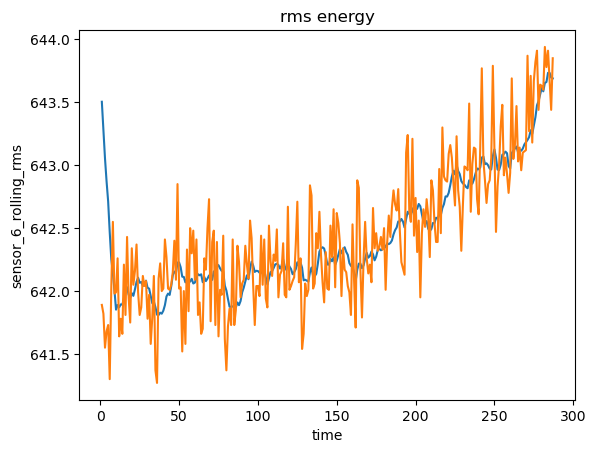

In [93]:
sns.lineplot(single_engine, x=single_engine['time'], y=single_engine['sensor_6_rolling_rms'])
sns.lineplot(single_engine, x=single_engine['time'], y=single_engine['sensor_6'])
plt.title('rms energy')
plt.show()

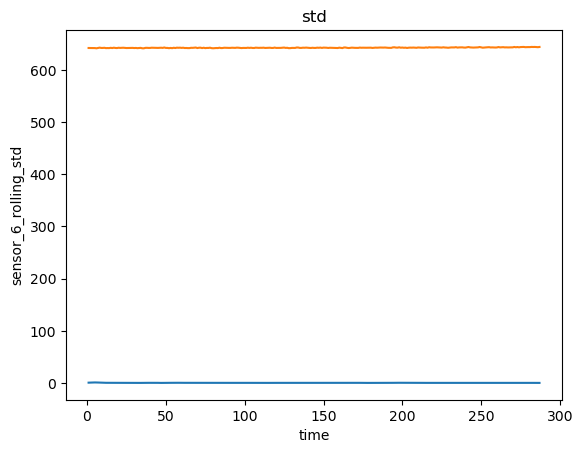

In [75]:
sns.lineplot(single_engine, x=single_engine['time'], y=single_engine['sensor_6_rolling_std'])
sns.lineplot(single_engine, x=single_engine['time'], y=single_engine['sensor_6'])
plt.title('std')
plt.show()

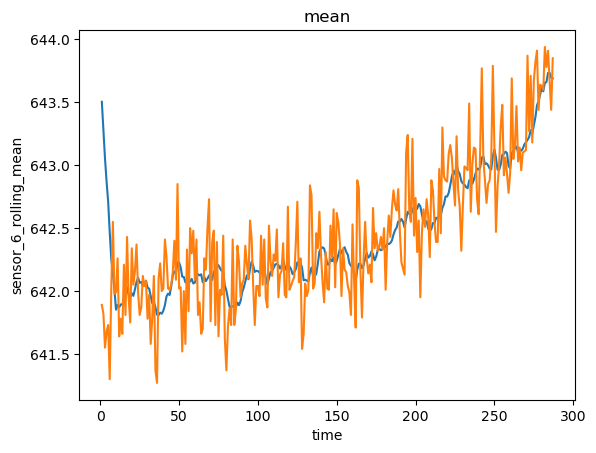

In [76]:
sns.lineplot(single_engine, x=single_engine['time'], y=single_engine['sensor_6_rolling_mean'])
sns.lineplot(single_engine, x=single_engine['time'], y=single_engine['sensor_6'])
plt.title('mean')
plt.show()

In [94]:
features_to_scale = train_data.columns[2:]
train_data[features_to_scale] = standard_scaler.fit_transform(train_data[features_to_scale])

In [95]:
train_data

,number,time,ops-set-1,sensor_6,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,...,sensor_18_rolling_rms,sensor_21_rolling_mean,sensor_21_rolling_std,sensor_21_rolling_rms,sensor_24_rolling_mean,sensor_24_rolling_std,sensor_24_rolling_rms,sensor_25_rolling_mean,sensor_25_rolling_std,sensor_25_rolling_rms
0,1,1,-0.315980,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,...,-0.637516,-1.173473,-0.169457,-1.173529,1.147819,-0.897584,1.147371,1.135589,-0.767200,1.135201
1,1,2,0.872722,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,...,-0.637516,-1.173473,-0.169457,-1.173529,1.147819,-0.897584,1.147371,1.135589,-0.767200,1.135201
2,1,3,-1.961874,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,...,-0.637516,-1.173473,-0.169457,-1.173529,1.147819,-0.897584,1.147371,1.135589,-0.767200,1.135201
3,1,4,0.324090,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,...,-0.637516,-1.173473,-0.169457,-1.173529,1.147819,-0.897584,1.147371,1.135589,-0.767200,1.135201
4,1,5,-0.864611,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,...,-0.637516,-1.173473,-0.169457,-1.173529,1.147819,-0.897584,1.147371,1.135589,-0.767200,1.135201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.178822,1.618000,1.216258,2.188375,-2.189329,1.315066,0.012547,1.980044,...,-0.142883,2.322485,1.328846,2.323078,-2.488927,1.278261,-2.488352,-2.243806,0.665729,-2.243726
20627,100,197,-0.727453,1.717992,2.279706,2.738351,-2.833345,1.878576,-0.006020,1.867718,...,-0.164948,2.239248,1.434497,2.239947,-2.742335,0.918147,-2.742126,-2.325031,0.154008,-2.325335
20628,100,198,0.186933,1.478011,1.946971,2.138377,-2.742957,2.019453,0.029755,2.054927,...,-0.158808,2.488959,1.737184,2.489909,-2.687545,0.885628,-2.687357,-2.463706,0.835694,-2.463515
20629,100,199,-0.498857,1.098043,2.403666,1.955051,-3.036719,2.160330,0.383884,3.178182,...,-0.161518,2.322485,1.780379,2.323499,-2.934104,0.379464,-2.934360,-2.458132,0.832224,-2.457943


In [ ]:
single_engine = train_data[train_data['number'] == 2]


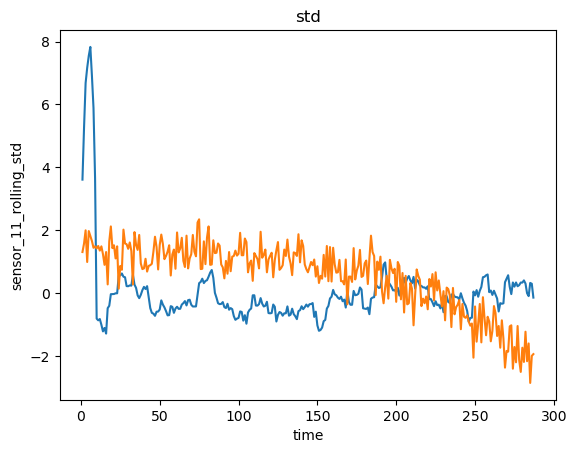

In [99]:
sns.lineplot(single_engine, x=single_engine['time'], y=single_engine['sensor_11_rolling_std'])
sns.lineplot(single_engine, x=single_engine['time'], y=single_engine['sensor_11'])
plt.title('std')
plt.show()

# remove std and mean feature keep rms only
 

In [101]:
train_data.columns

Index(['number', 'time', 'ops-set-1', 'sensor_6', 'sensor_7', 'sensor_8',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_21', 'sensor_24', 'sensor_25',
       'sensor_6_rolling_mean', 'sensor_6_rolling_std', 'sensor_6_rolling_rms',
       'sensor_7_rolling_mean', 'sensor_7_rolling_std', 'sensor_7_rolling_rms',
       'sensor_8_rolling_mean', 'sensor_8_rolling_std', 'sensor_8_rolling_rms',
       'sensor_11_rolling_mean', 'sensor_11_rolling_std',
       'sensor_11_rolling_rms', 'sensor_12_rolling_mean',
       'sensor_12_rolling_std', 'sensor_12_rolling_rms',
       'sensor_13_rolling_mean', 'sensor_13_rolling_std',
       'sensor_13_rolling_rms', 'sensor_15_rolling_mean',
       'sensor_15_rolling_std', 'sensor_15_rolling_rms',
       'sensor_16_rolling_mean', 'sensor_16_rolling_std',
       'sensor_16_rolling_rms', 'sensor_17_rolling_mean',
       'sensor_17_rolling_std', 'sensor_17_rolling_rms',
       'sensor_18_rolli

In [103]:
sensors = [6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 21, 24, 25]
cols_to_drop = []

for sensor in sensors:
    base_col = f"sensor_{sensor}"
    std_col = f"sensor_{sensor}_rolling_std"
    if base_col in train_data.columns:
        cols_to_drop.append(base_col)
    if std_col in train_data.columns:
        cols_to_drop.append(std_col)

train_data = train_data.drop(columns=cols_to_drop, axis=1)

In [104]:
train_data

,number,time,ops-set-1,sensor_6_rolling_mean,sensor_6_rolling_rms,sensor_7_rolling_mean,sensor_7_rolling_rms,sensor_8_rolling_mean,sensor_8_rolling_rms,sensor_11_rolling_mean,...,sensor_17_rolling_mean,sensor_17_rolling_rms,sensor_18_rolling_mean,sensor_18_rolling_rms,sensor_21_rolling_mean,sensor_21_rolling_rms,sensor_24_rolling_mean,sensor_24_rolling_rms,sensor_25_rolling_mean,sensor_25_rolling_rms
0,1,1,-0.315980,-1.224932,-1.224963,-0.610486,-0.610546,-1.040258,-1.040528,0.955078,...,-0.823145,-0.823147,-0.637557,-0.637516,-1.173473,-1.173529,1.147819,1.147371,1.135589,1.135201
1,1,2,0.872722,-1.224932,-1.224963,-0.610486,-0.610546,-1.040258,-1.040528,0.955078,...,-0.823145,-0.823147,-0.637557,-0.637516,-1.173473,-1.173529,1.147819,1.147371,1.135589,1.135201
2,1,3,-1.961874,-1.224932,-1.224963,-0.610486,-0.610546,-1.040258,-1.040528,0.955078,...,-0.823145,-0.823147,-0.637557,-0.637516,-1.173473,-1.173529,1.147819,1.147371,1.135589,1.135201
3,1,4,0.324090,-1.224932,-1.224963,-0.610486,-0.610546,-1.040258,-1.040528,0.955078,...,-0.823145,-0.823147,-0.637557,-0.637516,-1.173473,-1.173529,1.147819,1.147371,1.135589,1.135201
4,1,5,-0.864611,-1.224932,-1.224963,-0.610486,-0.610546,-1.040258,-1.040528,0.955078,...,-0.823145,-0.823147,-0.637557,-0.637516,-1.173473,-1.173529,1.147819,1.147371,1.135589,1.135201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.178822,1.980095,1.979970,1.979404,1.979278,2.206205,2.205389,-2.482486,...,2.225567,2.225564,-0.142799,-0.142883,2.322485,2.323078,-2.488927,-2.488352,-2.243806,-2.243726
20627,100,197,-0.727453,1.957111,1.956981,2.143323,2.143255,2.361717,2.360962,-2.570427,...,2.225567,2.225564,-0.164875,-0.164948,2.239248,2.239947,-2.742335,-2.742126,-2.325031,-2.325335
20628,100,198,0.186933,2.015849,2.015703,2.245284,2.245174,2.382427,2.381668,-2.548114,...,2.272957,2.272953,-0.158734,-0.158808,2.488959,2.489909,-2.687545,-2.687357,-2.463706,-2.463515
20629,100,199,-0.498857,1.898373,1.898228,2.362898,2.362881,2.425903,2.425051,-2.670181,...,2.257160,2.257157,-0.161445,-0.161518,2.322485,2.323499,-2.934104,-2.934360,-2.458132,-2.457943


In [105]:
sensors = [6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 21, 24, 25]
cols_to_drop = []

for sensor in sensors:
    mean_col = f"sensor_{sensor}_rolling_mean"
    if mean_col in train_data.columns:
        cols_to_drop.append(mean_col)

train_data = train_data.drop(columns=cols_to_drop, axis=1)


In [106]:
train_data

,number,time,ops-set-1,sensor_6_rolling_rms,sensor_7_rolling_rms,sensor_8_rolling_rms,sensor_11_rolling_rms,sensor_12_rolling_rms,sensor_13_rolling_rms,sensor_15_rolling_rms,sensor_16_rolling_rms,sensor_17_rolling_rms,sensor_18_rolling_rms,sensor_21_rolling_rms,sensor_24_rolling_rms,sensor_25_rolling_rms
0,1,1,-0.315980,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201
1,1,2,0.872722,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201
2,1,3,-1.961874,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201
3,1,4,0.324090,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201
4,1,5,-0.864611,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.178822,1.979970,1.979278,2.205389,-2.482661,2.039216,0.079944,2.417780,-2.420451,2.225564,-0.142883,2.323078,-2.488352,-2.243726
20627,100,197,-0.727453,1.956981,2.143255,2.360962,-2.570566,2.055224,0.075950,2.417780,-2.492740,2.225564,-0.164948,2.239947,-2.742126,-2.325335
20628,100,198,0.186933,2.015703,2.245174,2.381668,-2.548275,2.023209,0.067383,2.333534,-2.488125,2.272953,-0.158808,2.489909,-2.687357,-2.463515
20629,100,199,-0.498857,1.898228,2.362881,2.425051,-2.670295,2.135261,0.086789,2.501991,-2.461994,2.257157,-0.161518,2.323499,-2.934360,-2.457943


In [107]:
max_cycle_per_unit = train_data.groupby('number')['time'].max()

In [108]:
max_cycle_per_unit

number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time, Length: 100, dtype: int64

In [109]:
train_data['max_cycle'] = train_data['number'].map(max_cycle_per_unit)

In [110]:
train_data

,number,time,ops-set-1,sensor_6_rolling_rms,sensor_7_rolling_rms,sensor_8_rolling_rms,sensor_11_rolling_rms,sensor_12_rolling_rms,sensor_13_rolling_rms,sensor_15_rolling_rms,sensor_16_rolling_rms,sensor_17_rolling_rms,sensor_18_rolling_rms,sensor_21_rolling_rms,sensor_24_rolling_rms,sensor_25_rolling_rms,max_cycle
0,1,1,-0.315980,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201,192
1,1,2,0.872722,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201,192
2,1,3,-1.961874,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201,192
3,1,4,0.324090,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201,192
4,1,5,-0.864611,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.178822,1.979970,1.979278,2.205389,-2.482661,2.039216,0.079944,2.417780,-2.420451,2.225564,-0.142883,2.323078,-2.488352,-2.243726,200
20627,100,197,-0.727453,1.956981,2.143255,2.360962,-2.570566,2.055224,0.075950,2.417780,-2.492740,2.225564,-0.164948,2.239947,-2.742126,-2.325335,200
20628,100,198,0.186933,2.015703,2.245174,2.381668,-2.548275,2.023209,0.067383,2.333534,-2.488125,2.272953,-0.158808,2.489909,-2.687357,-2.463515,200
20629,100,199,-0.498857,1.898228,2.362881,2.425051,-2.670295,2.135261,0.086789,2.501991,-2.461994,2.257157,-0.161518,2.323499,-2.934360,-2.457943,200


In [111]:
train_data['RUL'] = train_data['max_cycle'] - train_data['time']

In [112]:
train_data = train_data.drop(columns=['max_cycle'], axis=1)

In [113]:
train_data

,number,time,ops-set-1,sensor_6_rolling_rms,sensor_7_rolling_rms,sensor_8_rolling_rms,sensor_11_rolling_rms,sensor_12_rolling_rms,sensor_13_rolling_rms,sensor_15_rolling_rms,sensor_16_rolling_rms,sensor_17_rolling_rms,sensor_18_rolling_rms,sensor_21_rolling_rms,sensor_24_rolling_rms,sensor_25_rolling_rms,RUL
0,1,1,-0.315980,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201,191
1,1,2,0.872722,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201,190
2,1,3,-1.961874,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201,189
3,1,4,0.324090,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201,188
4,1,5,-0.864611,-1.224963,-0.610546,-1.040528,0.955026,-0.762096,-0.754697,-1.130780,1.125681,-0.823147,-0.637516,-1.173529,1.147371,1.135201,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.178822,1.979970,1.979278,2.205389,-2.482661,2.039216,0.079944,2.417780,-2.420451,2.225564,-0.142883,2.323078,-2.488352,-2.243726,4
20627,100,197,-0.727453,1.956981,2.143255,2.360962,-2.570566,2.055224,0.075950,2.417780,-2.492740,2.225564,-0.164948,2.239947,-2.742126,-2.325335,3
20628,100,198,0.186933,2.015703,2.245174,2.381668,-2.548275,2.023209,0.067383,2.333534,-2.488125,2.272953,-0.158808,2.489909,-2.687357,-2.463515,2
20629,100,199,-0.498857,1.898228,2.362881,2.425051,-2.670295,2.135261,0.086789,2.501991,-2.461994,2.257157,-0.161518,2.323499,-2.934360,-2.457943,1


In [ ]:
sensor_cols = [col for col in train_data.columns if '_rms' in col]

def apply_lowess_slope(group):
    for col in sensor_cols:
        # apply lowess smoothing 
        smoothed = lowess(endog=group[col], exog=group['time'], frac=0.5, return_sorted=False)

        slope = np.gradient(smoothed)

        group[f"{col}_lowess_slope"] = slope
    return group

train_data = train_data.groupby('number').apply(apply_lowess_slope)

C:\Users\tanbi\AppData\Local\Temp\ipykernel_23008\1476820954.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data = train_data.groupby('number').apply(apply_lowess_slope)


In [121]:
train_data

number  time  ops-set-1  sensor_6_rolling_rms  \
number                                                        
1      0           1     1  -0.315980             -1.224963   
       1           1     2   0.872722             -1.224963   
       2           1     3  -1.961874             -1.224963   
       3           1     4   0.324090             -1.224963   
       4           1     5  -0.864611             -1.224963   
...              ...   ...        ...                   ...   
100    20626     100   196  -0.178822              1.979970   
       20627     100   197  -0.727453              1.956981   
       20628     100   198   0.186933              2.015703   
       20629     100   199  -0.498857              1.898228   
       20630     100   200  -1.458962              2.084659   

              sensor_7_rolling_rms  sensor_8_rolling_rms  \
number                                                     
1      0                 -0.610546             -1.040528   
       1                 -0.610546             -1.040528   
       2                 -0.610546             -1.040528   
       3                 -0.610546             -1.040528   
       4                 -0.610546             -1.040528   
...                            ...                   ...   
100    20626              1.979278              2.205389   
       20627              2.143255              2.360962   
       20628              2.245174              2.381668   
       20629              2.362881              2.425051   
       20630              2.491443              2.503553   

              sensor_11_rolling_rms  sensor_12_rolling_rms  \
number                                                       
1      0                   0.955026              -0.762096   
       1                   0.955026              -0.762096   
       2                   0.955026              -0.762096   
       3                   0.955026              -0.762096   
       4                   0.955026              -0.762096   
...                             ...                    ...   
100    20626              -2.482661               2.039216   
       20627              -2.570566               2.055224   
       20628              -2.548275               2.023209   
       20629              -2.670295               2.135261   
       20630              -2.705710               2.215298   

              sensor_13_rolling_rms  sensor_15_rolling_rms  ...  \
number                                                      ...   
1      0                  -0.754697              -1.130780  ...   
       1                  -0.754697              -1.130780  ...   
       2                  -0.754697              -1.130780  ...   
       3                  -0.754697              -1.130780  ...   
       4                  -0.754697              -1.130780  ...   
...                             ...                    ...  ...   
100    20626               0.079944               2.417780  ...   
       20627               0.075950               2.417780  ...   
       20628               0.067383               2.333534  ...   
       20629               0.086789               2.501991  ...   
       20630               0.071106               2.590200  ...   

              sensor_11_rolling_rms_lowess_slope  \
number                                             
1      0                                0.001492   
       1                                0.001482   
       2                                0.001444   
       3                                0.001368   
       4                                0.001241   
...                                          ...   
100    20626                           -0.052700   
       20627                           -0.052202   
       20628                           -0.051828   
       20629                           -0.051569   
       20630                           -0.051469   

              sensor_12_rolling_rms_lowess_slope  \
numbe